In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#read data
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
#shape
df.shape

(10861, 17)

In [7]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,float64


In [8]:
# missing value
df.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


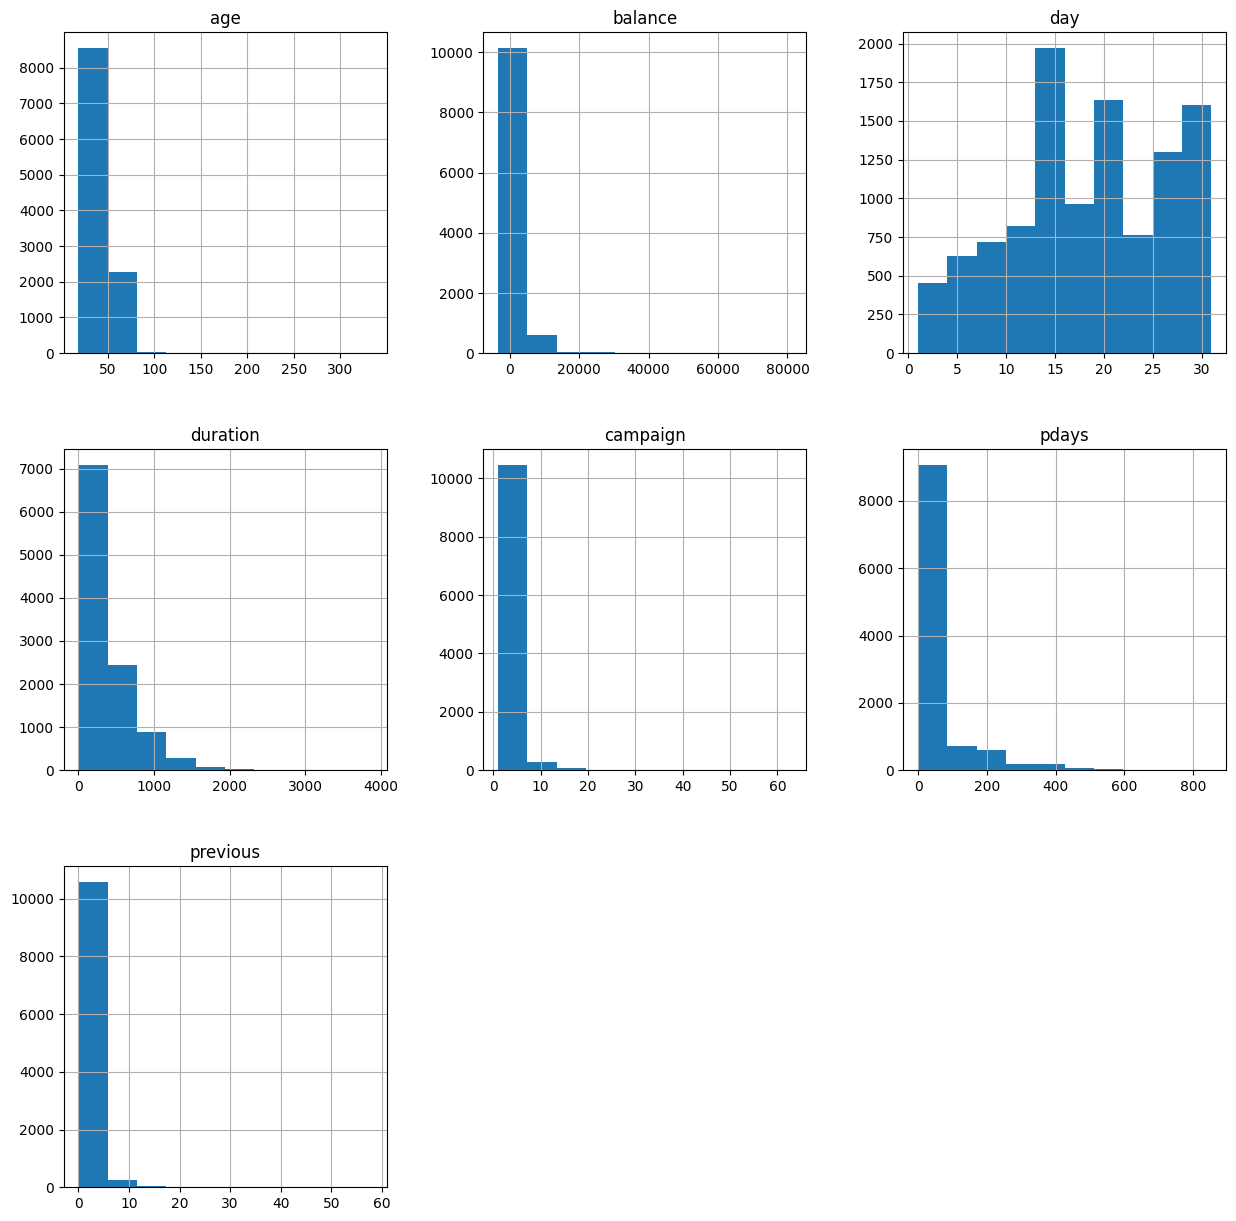

In [9]:
#histogram
df.hist(figsize=(15,15))
plt.show()

In [10]:
# Fill missing values with mode (most frequent value) for categorical columns
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)

# Fill missing values with median for numerical columns that could be skewed
df['balance'].fillna(df['balance'].median(), inplace=True)
df['pdays'].fillna(df['pdays'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)

# Fill missing values with mean for numerical columns that are more normally distributed
df['day'].fillna(df['day'].mean(), inplace=True)


In [11]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [12]:
#print catogorical column
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
df['job'].value_counts()

,count
job,
blue-collar,2569
management,2134
technician,1718
admin.,1317
services,997
retired,664
student,326
self-employed,320
unemployed,314


In [14]:
df['marital'].value_counts()

,count
marital,
married,6169
single,3461
divorced,1231


In [15]:
#mapping
df['marital'].replace({'married':0,'single':1,'divorced':2},inplace=True)

In [16]:
df['marital'].value_counts()

,count
marital,
0,6169
1,3461
2,1231


In [17]:
df['contact'].value_counts()

,count
contact,
unknown,6102
cellular,4369
telephone,390


In [18]:
df['contact'].replace({'cellular':0,'telephone':1,'unknown':2},inplace=True)

In [19]:
df['contact'].value_counts()

,count
contact,
2,6102
0,4369
1,390


In [20]:
df['education'].value_counts()

,count
education,
secondary,5729
tertiary,3081
primary,1565
unknown,486


In [21]:
df['education'].replace({'primary':0,'secondary':1,'tertiary':2,'unknown':3},inplace=True)

In [22]:
df['education'].value_counts()

,count
education,
1,5729
2,3081
0,1565
3,486


In [23]:
df['default'].value_counts()

,count
default,
no,10691
yes,170


In [24]:
df['default'].replace({'yes':1,'no':0},inplace=True)

In [25]:
df['default'].value_counts()

,count
default,
0,10691
1,170


In [26]:
df['housing'].value_counts()

,count
housing,
yes,6954
no,3907


In [27]:
df['housing'].replace({'yes':1,'no':0},inplace=True)

In [28]:
df['housing'].value_counts()

,count
housing,
1,6954
0,3907


In [29]:
df['loan'].value_counts()

,count
loan,
no,9508
yes,1353


In [30]:
df['loan'].replace({'yes':1,'no':0},inplace=True)

In [31]:
df['loan'].value_counts()

,count
loan,
0,9508
1,1353


In [32]:
df['month'].value_counts()

,count
month,
may,6497
aug,688
jul,627
apr,577
jun,546
feb,441
nov,403
oct,323
sep,269


In [33]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8958
success,978
failure,618
other,307


In [34]:
df['poutcome'].replace({'unknown':0,'failure':1,'other':2,'success':3},inplace=True)

In [35]:

df['poutcome'].value_counts()

,count
poutcome,
0,8958
3,978
1,618
2,307


In [36]:
df['y'].value_counts()

,count
y,
no,5572
yes,5289


In [37]:

df['y'].replace({'yes':1,'no':0},inplace=True)

In [38]:
df['y'].value_counts()

,count
y,
0,5572
1,5289


In [39]:
#find duplicate
df.duplicated().sum()

0

In [40]:
#exploratory data analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10861.0,40.323727,11.969443,18.0,32.0,38.0,47.0,334.0
marital,10861.0,0.545346,0.688963,0.0,0.0,0.0,1.0,2.0
education,10861.0,1.229077,0.744536,0.0,1.0,1.0,2.0,3.0
default,10861.0,0.015652,0.124132,0.0,0.0,0.0,0.0,1.0
balance,10861.0,1457.230642,3076.703000,-3372.0,107.0,524.0,1633.0,81204.0
housing,10861.0,0.640273,0.479943,0.0,0.0,1.0,1.0,1.0
loan,10861.0,0.124574,0.330251,0.0,0.0,0.0,0.0,1.0
contact,10861.0,1.159562,0.968875,0.0,0.0,2.0,2.0,2.0
day,10861.0,17.887937,7.845954,1.0,13.0,18.0,26.0,31.0
duration,10861.0,386.049903,345.123049,0.0,157.0,268.0,507.0,3881.0


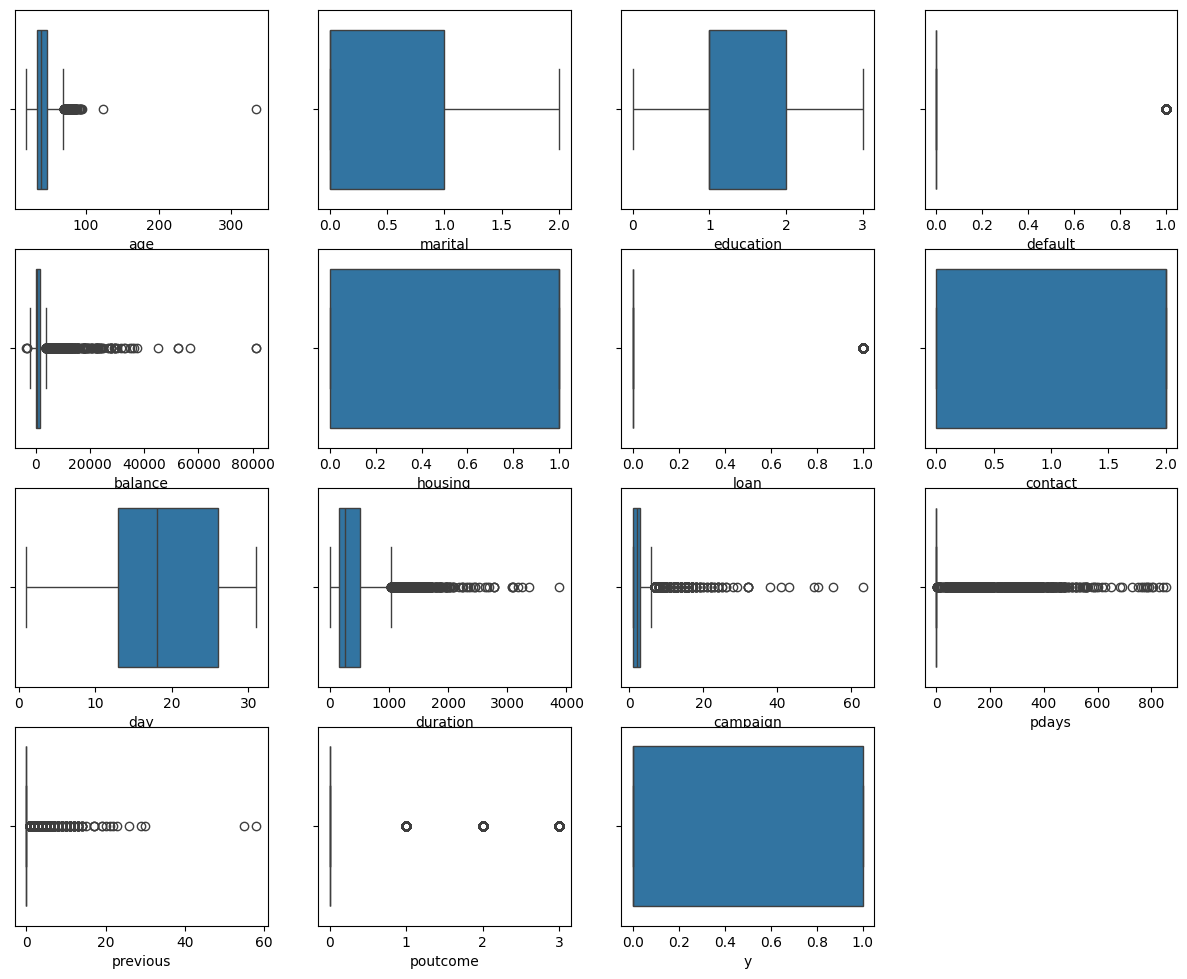

In [41]:

#box plot
outlier_columns = df.select_dtypes(exclude=['object']).columns
plt.figure(figsize=(15, 15)) # Increased figure size to accommodate more plots
# Changed subplot layout to 5x4 to accommodate 17 plots
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[column])

plt.show()

In [42]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10856,45,housemaid,2,0,0,413.0,1,0,2,30.0,may,65.0,1,-1.0,0,0,0
10857,51,admin.,0,1,0,4178.0,1,0,2,30.0,may,556.0,1,-1.0,0,0,0
10858,40,management,0,2,0,2147.0,1,0,2,30.0,may,115.0,1,-1.0,0,0,0
10859,43,blue-collar,0,1,0,1096.0,0,1,2,30.0,may,180.0,1,-1.0,0,0,0
10860,41,admin.,1,2,0,1455.0,1,0,2,30.0,may,87.0,1,-1.0,0,0,0


In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,0,1,0,2343.0,1,0,2,5.0,may,1042.0,1,-1.0,0,0,1
1,56,admin.,0,1,0,45.0,0,0,2,5.0,may,1467.0,1,-1.0,0,0,1
2,41,technician,0,1,0,1270.0,1,0,2,5.0,may,1389.0,1,-1.0,0,0,1
3,55,services,0,1,0,2476.0,1,0,2,5.0,may,579.0,1,-1.0,0,0,1
4,54,admin.,0,2,0,184.0,0,0,2,5.0,may,673.0,2,-1.0,0,0,1


                age   marital  education   default   balance   housing  \
age        1.000000 -0.120878  -0.090064 -0.029812  0.110365 -0.162986   
marital   -0.120878  1.000000   0.084941  0.016464 -0.022602 -0.041029   
education -0.090064  0.084941   1.000000 -0.004925  0.071457 -0.162343   
default   -0.029812  0.016464  -0.004925  1.000000 -0.069947  0.032695   
balance    0.110365 -0.022602   0.071457 -0.069947  1.000000 -0.108333   
housing   -0.162986 -0.041029  -0.162343  0.032695 -0.108333  1.000000   
loan      -0.048685 -0.025032  -0.052032  0.051263 -0.080695  0.121831   
contact   -0.077925 -0.062501  -0.185856  0.051201 -0.099733  0.553552   
day       -0.072387 -0.008266  -0.043320  0.014470 -0.031638  0.191375   
duration   0.021498  0.037458   0.017085 -0.008715  0.029100 -0.101978   
campaign  -0.002604 -0.027933  -0.010598  0.004112 -0.019899  0.064867   
pdays      0.057043  0.007340   0.080386 -0.033086  0.050441 -0.176632   
previous   0.059366 -0.009457   0.0643

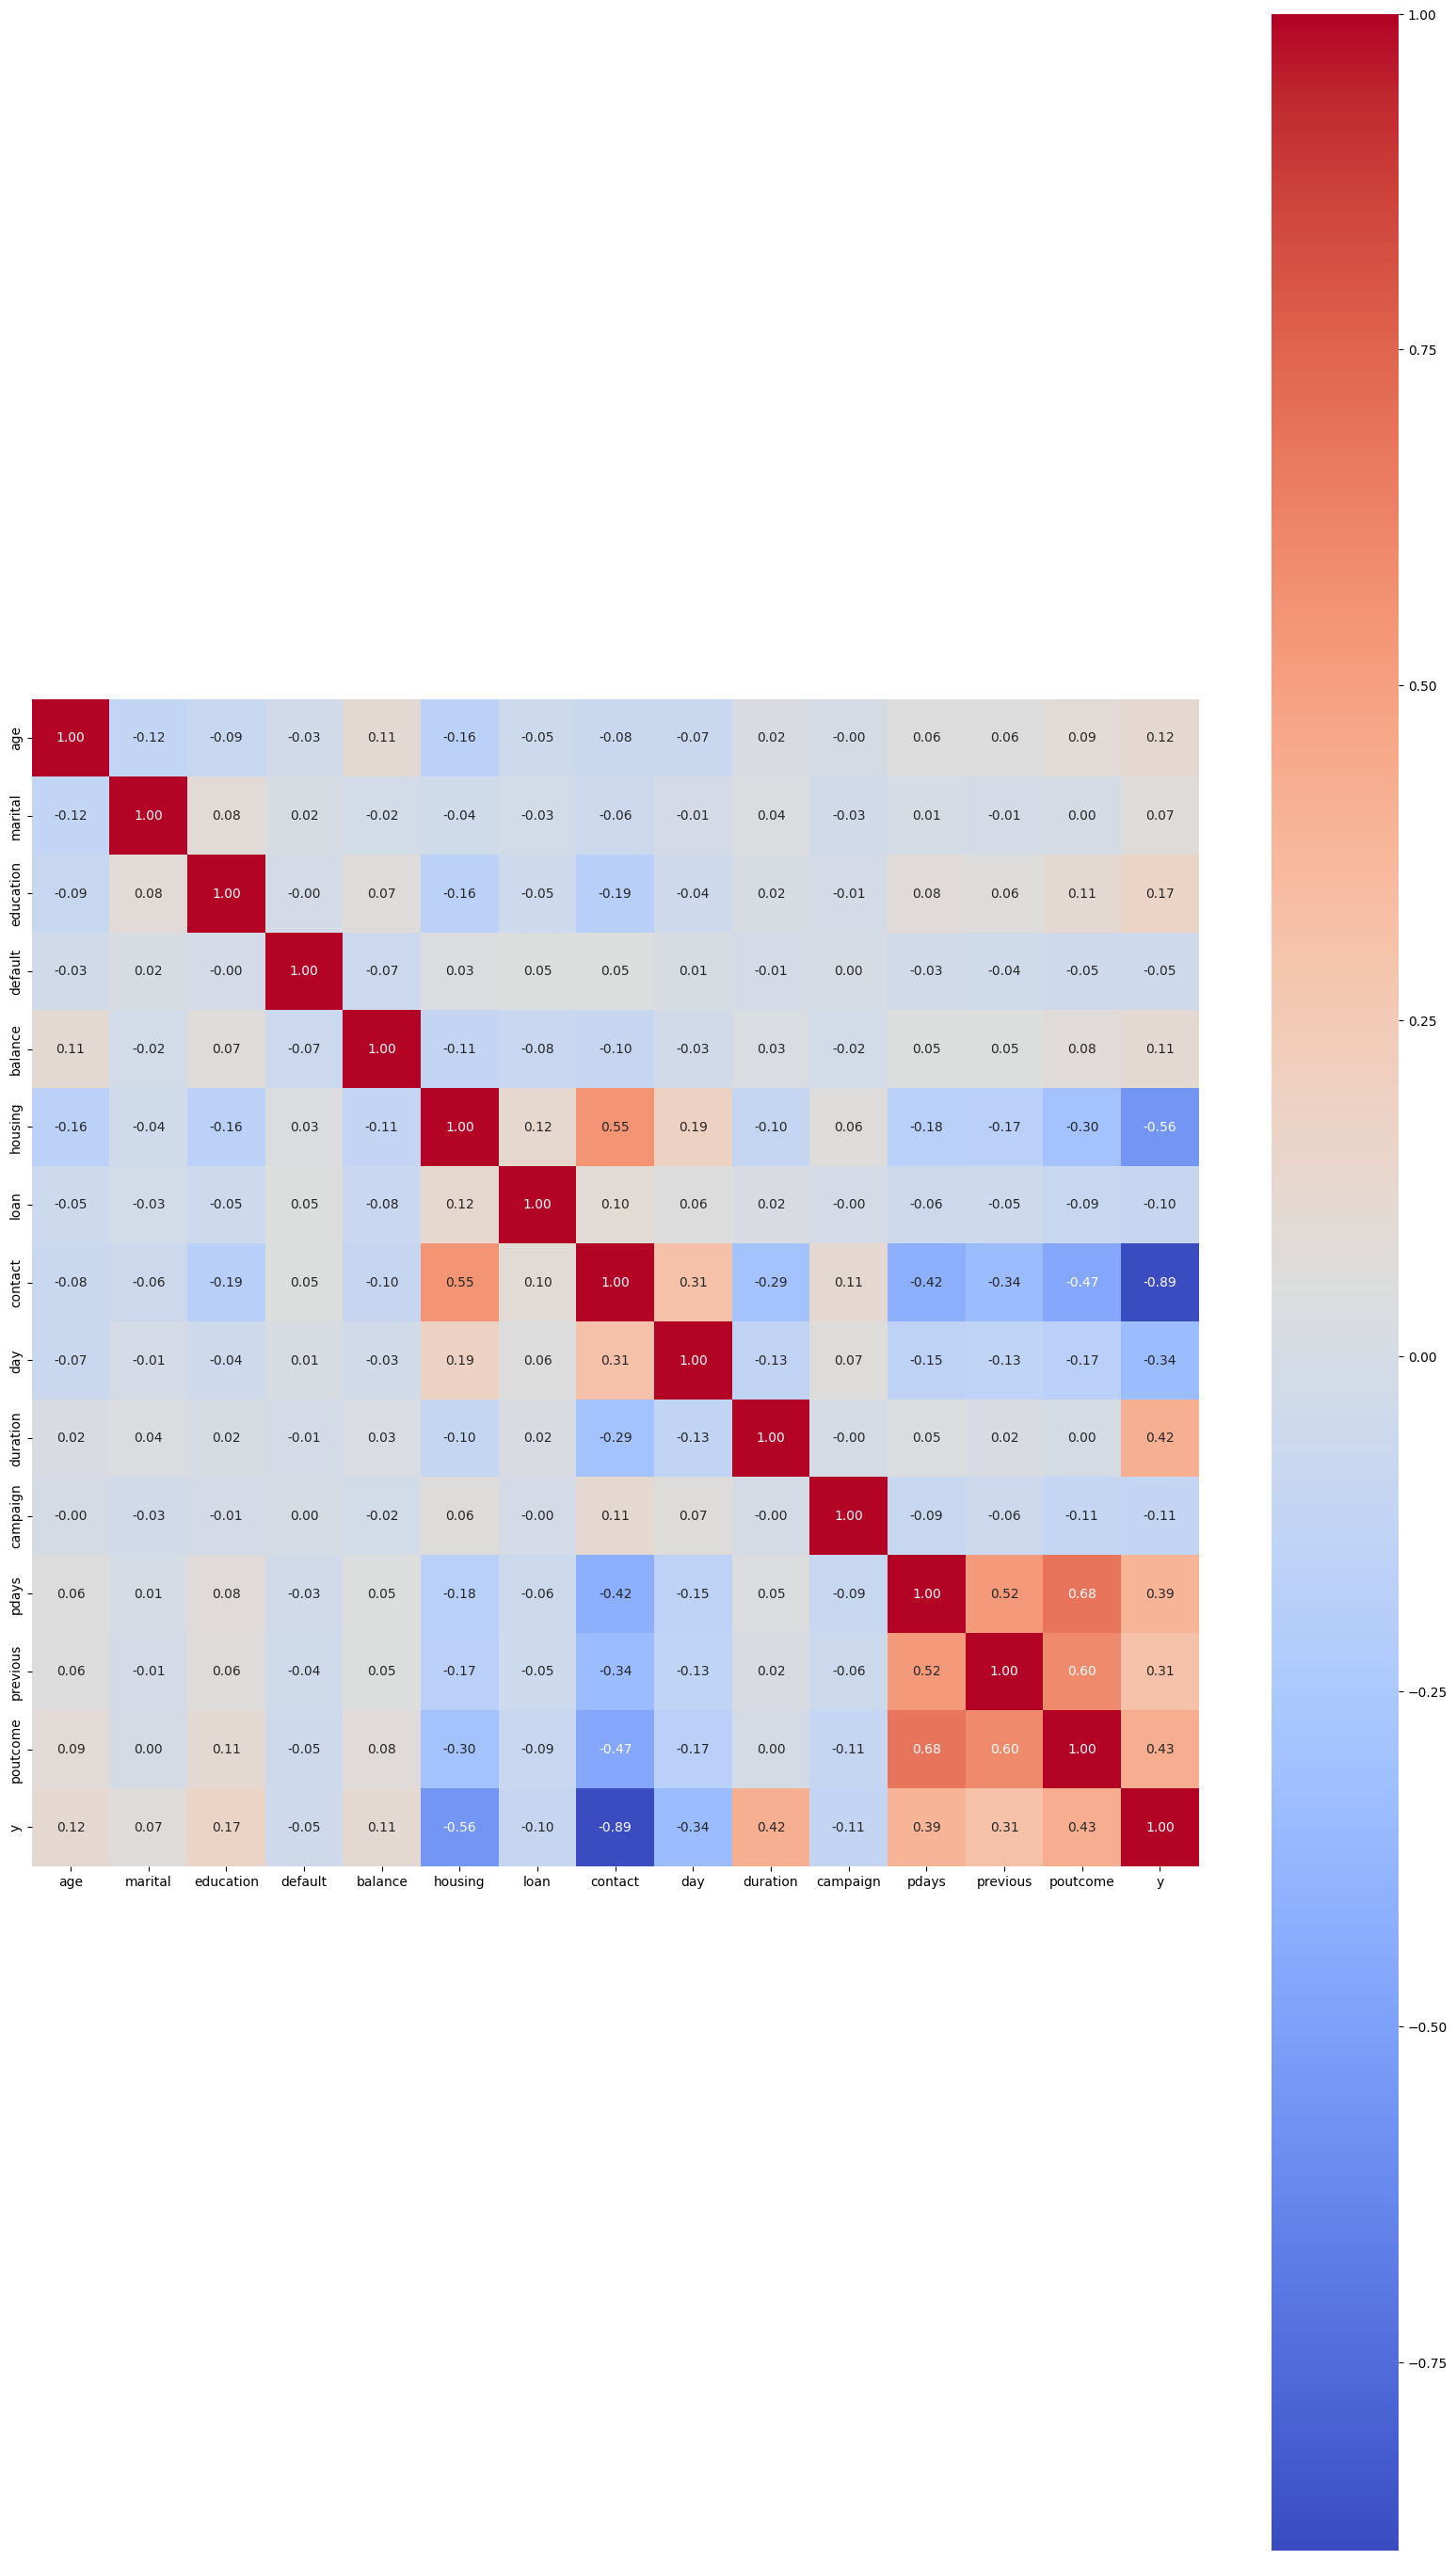

In [44]:

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(20, 35))
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
# Display the heatmap
plt.show()


In [45]:
# show only object columns name
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['job', 'month'], dtype='object')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10861 non-null  object 
 2   marital    10861 non-null  int64  
 3   education  10861 non-null  int64  
 4   default    10861 non-null  int64  
 5   balance    10861 non-null  float64
 6   housing    10861 non-null  int64  
 7   loan       10861 non-null  int64  
 8   contact    10861 non-null  int64  
 9   day        10861 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10861 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10861 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  int64  
 16  y          10861 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 1.4+ MB


In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


# target
X_ = df.drop('loan', axis=1)
y = df['loan']

#  categorical columns
categorical_cols = X_.select_dtypes(include=['object']).columns

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X_[col] = le.fit_transform(X_[col].astype(str))

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)






In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf=RandomForestClassifier(n_estimators=100,random_state=60,max_depth=12,criterion='entropy',class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=60)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
y_pred = rf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))


Accuracy Score : 0.7073170731707317
Confusion matrix :
 [[1396  506]
 [ 130  141]]
Precision Score : 0.21792890262751158


In [50]:
#training
from sklearn.tree import   DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [51]:
y_pred = dt.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))

Accuracy Score : 0.8752876208007363
Confusion matrix :
 [[1902    0]
 [ 271    0]]
Precision Score : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#knn neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:


y_pred = knn.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))

Accuracy Score : 0.8582604693971468
Confusion matrix :
 [[1848   54]
 [ 254   17]]
Precision Score : 0.23943661971830985


case 1 : over fitting  precission score is very low .i understand the oversampling  accuracy is low


In [54]:


from imblearn.over_sampling import SMOTE


# target
X_ = df.drop('loan', axis=1)
y = df['loan']

#  categorical columns
categorical_cols = X_.select_dtypes(include=['object']).columns

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X_[col] = le.fit_transform(X_[col].astype(str))

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(pd.Series(y_train_res).value_counts())



loan
0    7606
1    1082
Name: count, dtype: int64
loan
0    7606
1    7606
Name: count, dtype: int64


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf=RandomForestClassifier(n_estimators=100,random_state=60,max_depth=12,criterion='entropy',class_weight='balanced')
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=60)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
y_pred = rf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))


Accuracy Score : 0.6277036355269213
Confusion matrix :
 [[1192  710]
 [  99  172]]
Precision Score : 0.19501133786848074


In [57]:
#training
from sklearn.tree import   DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [58]:
y_pred = dt.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))

Accuracy Score : 0.45467096180395766
Confusion matrix :
 [[ 770 1132]
 [  53  218]]
Precision Score : 0.16148148148148148


case 2 under fitting

In [59]:

from imblearn.under_sampling import RandomUnderSampler


# Separating features and target variable
X_ = df.drop('loan', axis=1)
y = df['loan']

# Identify categorical columns
categorical_cols = X_.select_dtypes(include=['object']).columns

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X_[col] = le.fit_transform(X_[col].astype(str))

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply RandomUnderSampler to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)





In [60]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf=RandomForestClassifier(n_estimators=100,random_state=60,max_depth=12,criterion='entropy',class_weight='balanced')
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=60)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
y_pred = rf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))


Accuracy Score : 0.5789231477220432
Confusion matrix :
 [[1063  839]
 [  76  195]]
Precision Score : 0.1885880077369439


In [62]:
#training
from sklearn.tree import   DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [63]:
y_pred = dt.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred))

Accuracy Score : 0.4289001380579843
Confusion matrix :
 [[ 707 1195]
 [  46  225]]
Precision Score : 0.15845070422535212


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Implement GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy found:  0.8759208103130756


*result: best model
random forest classifier
accuracy score : 70% *